# K.P model for Weyl fermions

In this tutorial we wil investigate the properties of a Weyl Hamiltonian

# First, import needed modules

In [1]:
# So, first import the necessary modules

import wannierberri as wberri
print (f"Using WannierBerri version {wberri.__version__}")
import pythtb
import numpy as np
import matplotlib.pyplot as plt

Using WannierBerri version 0.14.0


## Define Parallel environment

In [9]:
#  This block is needed if you run this cell for a second time
#  because one cannot initiate two parallel environments at a time
try:
    parallel.shutdown()
except NameError:
    pass

# Chiose one of the options:

#parallel = wberri.Parallel(num_cpus=2)
#parallel = wberri.Parallel()  # automatic detection
parallel = wberri.Serial()

## Free-electron k.p model

For simplicity, it is a 1-band free-electron

In [10]:
# hamiltonian takes k-vector in reciprocal angstroms and gives hamiltonian in eV
mass = 1.5   # in units Ang^2/eV
def ham(k):
    return np.array([[np.dot(k,k)/(2*mass)]])
# k.p model is bounded to a box of size 2*kmax
system_kp = wberri.system.SystemKP(Ham=ham, kmax=2)

Number of wannier functions: 1


In [11]:
path=wberri.Path(system_kp,
                 k_nodes=[
        [0.0000, 0.0000, 0.0000 ],   #  G
        [1.0 ,1.0, 1.0],   #  G
        [0.0, 1.0, 1.0],   #  G
        [0.0,1.0,0.0]   #  G
                 ] ,
                 labels=["G0","G111","G011","G010"],
                 length=200 )   # length [ Ang] ~= 2*pi/dk

tabulators = { "Energy": wberri.calculators.tabulate.Energy(),
             }

tab_all_path = wberri.calculators.TabulatorAll(
                    tabulators,
                    # ibands = np.arange(0,18),
                    mode = "path"
                        )

calculator not described



In [7]:
result=wberri.run(system_kp,
                  grid=path,
                  calculators = {"tabulate" : tab_all_path},
                  parallel = parallel,
                  print_Kpoints = False)

print (result.results)
path_result = result.results["tabulate"]

Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7f7b4c290040>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 476 points and labels {0: 'G0', 221: 'G111', 348: 'G011', 475: 'G010'}
generating K_list
Done 
Done, sum of weights:476.0
symgroup : None
processing 476 K points : using  2 processes.
# K-points calculated  Wall time (sec)  Est. remaining (sec)


(raylet) [2023-08-22 11:07:06,640 E 45700 45713] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-08-22_11-04-43_914384_45615 is over 95% full, available space: 2834382848; capacity: 119125549056. Object creation will fail if spilling is required.


time for processing    476 K-points on   2 processes:     0.8129 ; per K-point          0.0017 ; proc-sec per K-point          0.0034
time1 =  0.028372526168823242
Totally processed 476 K-points 
{'tabulate': <wannierberri.result.__tabresult.TABresult object at 0x7f7b4c2c1e70>}


## Plot bands

The `TABresult` object already provides methods to plot the results. (As well as one can extract the data and plot them by other means). Below let’s plot the interpolated bands and compare with those obtained in QE. (file “bands/Fe_bands_pw.dat” is already provided)

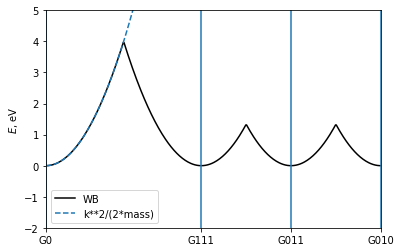

In [30]:
path_result = result.results["tabulate"]

plt.close()
path_result.plot_path_fat( path,
              quantity=None,
#              Eshift=EF,
              Emin=-2,  Emax=5,
              iband=None,
              mode="fatband",
              fatfactor=20,
              cut_k=False,
              close_fig=False,
              show_fig=False,
              label = "WB"
              )

kline = path.getKline()
plt.plot(kline,kline**2/(2*mass),"--",label="k**2/(2*mass)")

plt.legend()
plt.show()
plt.close()

In [33]:
Efermi = np.linspace(-1,2,201)
calculators = {"dos":wberri.calculators.static.DOS(
                    Efermi=Efermi, # Fermi levels to scan
                    tetra=True  # use tetahedron integration method
                        )}
grid = wberri.Grid(system_kp, NK=20, NKFFT=10 )
result_run = wberri.run(system_kp,
            grid=grid,
            calculators = calculators,
            parallel=parallel,
            adpt_num_iter=0,
            fout_name='kp',
            restart=False,
            #print_Kpoints=False
            #file_Klist="Klist_ahc.pickle"  # needed to restart a calculation in future
            )

Density of states

determining grids from NK=20 (<class 'int'>), NKdiv=None (<class 'NoneType'>), NKFFT=10 (<class 'NoneType'>)
The grids were set to NKdiv=[2 2 2], NKFFT=[10 10 10], NKtot=[20 20 20]
Grid is regular
The set of k points is a Grid() with NKdiv=[2 2 2], NKFFT=[10 10 10], NKtot=[20 20 20]
generating K_list
Done in 0.00015282630920410156 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.003221273422241211 s 
Done in 0.003259420394897461 s 
K_list contains 8 Irreducible points(100.0%) out of initial 2x2x2=8 grid
Done, sum of weights:1.0
iteration 0 - 8 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.000000 ], refinement level:0, factor = 0.125dK=[0.5 0.5 0.5]  
 K-point 1 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.500000 ], refinement level:0, factor = 0.125dK=[0.5 0.5 0.5]  
 K-point 2 : coord in rec.lattice = [   0.000000  ,   0.500000 ,    0.000000 ], refinement level:0, factor = 0.125dK=[0.

# Plot the DOS and compare with the analytical value
For free-electron energies
$$\varepsilon(k)=\frac{k^2}{2m}$$
The DOS can be evaluated analytically
$${\rm DOS}(E_F) = \int \frac{d^3k}{(2\pi)^3} \delta(E-\varepsilon(k)) = \frac{4\pi}{(2\pi)^3}\int k^2 dk \delta(E-k^2/(2m)) = \frac{1}{2\pi^2} \int dk k\delta(k-\sqrt{2mE_F}) = \frac{\sqrt{2mE_F}}{2\pi^2}$$

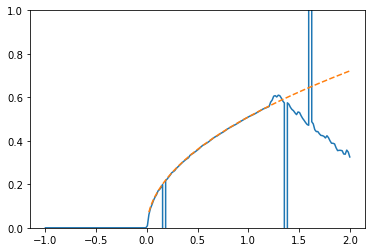

In [35]:
dos = result_run.results["dos"].data
plt.plot(Efermi,dos)
plt.ylim(0,1)

Efpos=Efermi[Efermi>0.01]

dos_prec = np.sqrt(2*mass*Efpos)*system_kp.cell_volume*mass/(2*np.pi**2)

plt.plot(Efpos,dos_prec,"--")


# Now, the Weyl Hamiltonian

In [296]:
sigma_x = np.array([[ 0, 1],
                    [1, 0]])
sigma_y = np.array([[ 0, -1j],
                    [1j, 0]])
sigma_z = np.array([[-1, 0],
                    [ 0, 1]])

v=2 # in units eV*Ang
vx=v
vy=v
vz=v


def Ham_Weyl(k):
    return vx*k[0]*sigma_x + vy*k[1]*sigma_y + vz*k[2]*sigma_z

kmax_weyl=0.2
system_weyl = wberri.system.SystemKP(Ham=Ham_Weyl, kmax=kmax_weyl)
system_weyl.set_symmetry(["C4x","C4y","C4z","TimeReversal"])

Number of wannier functions: 2


In [297]:
direction = np.array([0,0.0,0.1])/(2*kmax_weyl)  # Note, that k-points are given to path in reciprocal coordinates
path=wberri.Path(system_weyl,
                 k_nodes=[
        -direction,   #  
        [0 ,0, 0],   #  
        direction,   #  
                 ] ,
                 labels=["-kz","0","+kz"],
                 nk=20 )  

tabulators = { "Energy": wberri.calculators.tabulate.Energy(),
               "berry": wberri.calculators.tabulate.BerryCurvature(kwargs_formula={"external_terms":False}),
             }

tab_all_path = wberri.calculators.TabulatorAll(
                    tabulators,
                    # ibands = np.arange(0,18),
                    mode = "path"
                        )

result=wberri.run(system_weyl,
                  grid=path,
                  calculators = {"tabulate" : tab_all_path},
                  parallel = parallel,
                  print_Kpoints = False)

print (result.results)
path_result = result.results["tabulate"]

calculator not described

calculator not described

Calculation along a path - checking calculators for compatibility
tabulate <wannierberri.calculators.TabulatorAll object at 0x7f7b1d05df60>
All calculators are compatible
Symmetrization switched off for Path
Grid is regular
The set of k points is a Path() with 39 points and labels {0: '-kz', 19: '0', 38: '+kz'}
generating K_list
Done 
Done, sum of weights:39.0
symgroup : None
processing 39 K points : in serial.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing     39 K-points in serial:     0.0528 ; per K-point          0.0014 ; proc-sec per K-point          0.0014
time1 =  0.0015652179718017578
Totally processed 39 K-points 
{'tabulate': <wannierberri.result.__tabresult.TABresult object at 0x7f7b1e133100>}


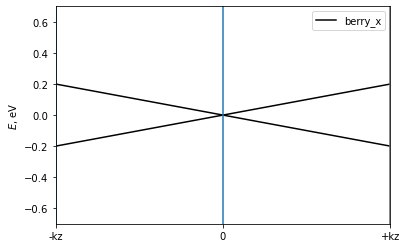

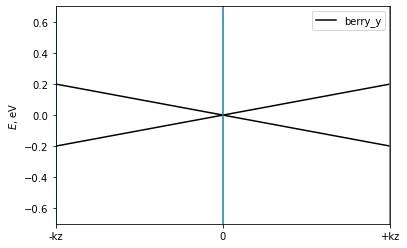

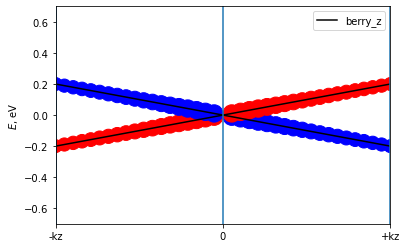

In [298]:
for component in "xyz":
    path_result.plot_path_fat( path,
              quantity="berry",
                component=component,
        #save_file="Fe_bands+QE.pdf",
#              Eshift=EF,
     #         Emin=-0.05,  Emax=0.05,
              iband=None,
              mode="fatband",
              fatfactor=30,
              cut_k=False,
              close_fig=True,
              show_fig=True,
              label = "berry_"+component
              )

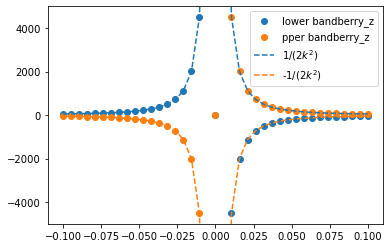

In [254]:
berry_curv = path_result.get_data("berry",iband=(0,1))
kline = path.getKline()
kline-=kline.mean()
#berry_curv.shape
plt.scatter(kline,berry_curv[:,0,2],label="lower bandberry_z")
plt.scatter(kline,berry_curv[:,1,2],label="pper bandberry_z")
plt.plot(kline,0.5/kline**2,"--",label=r"1/(2$k^2$)")
plt.plot(kline,-0.5/kline**2,"--",label=r"-1/(2$k^2)$")

plt.ylim(-5000,5000)
plt.legend()

Density of states

Berry curvature dipole (dimensionless)

        | With Fermi surface integral. Eq(8) in `Ref <https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.115.216806>`__
        | Output: :math:`D_{\beta\delta} = -\int [dk] v_\beta \Omega_\delta f'`

determining grids from NK=20 (<class 'int'>), NKdiv=None (<class 'NoneType'>), NKFFT=5 (<class 'NoneType'>)
The grids were set to NKdiv=[4 4 4], NKFFT=[5 5 5], NKtot=[20 20 20]
Grid is regular
The set of k points is a Grid() with NKdiv=[4 4 4], NKFFT=[5 5 5], NKtot=[20 20 20]
generating K_list
Done in 0.0006833076477050781 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.019047260284423828 s 
Done in 0.01907181739807129 s 
K_list contains 10 Irreducible points(15.62%) out of initial 4x4x4=64 grid
Done, sum of weights:1.0
iteration 0 - 10 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.000000 ], refinement level:0, factor = 0.015625dK=[0.25 0.25 0.25]  
 K-po

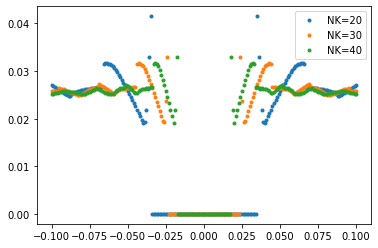

In [255]:
Efermi_Weyl = np.linspace(-0.1,0.1,201)
Efermi=Efermi_Weyl
calculators = {
               "dos":wberri.calculators.static.DOS(Efermi=Efermi,tetra=True),
               "berry_dipole_surf":wberri.calculators.static.BerryDipole_FermiSurf(Efermi=Efermi,tetra=True,kwargs_formula={"external_terms":False}),
               #"berry_dipole_sea":wberri.calculators.static.BerryDipole_FermiSea(Efermi=Efermi,tetra=True,kwargs_formula={"external_terms":False})
}

system_weyl.set_symmetry(["C4x","C4y","C4z","TimeReversal"])

result={}
for NK in 20,30,40:
    grid = wberri.Grid(system_weyl, NK=NK, NKFFT=5 )
    result[NK] = wberri.run(system_weyl,
            grid=grid,
            calculators = calculators,
            parallel=parallel,
            fout_name='Weyl',
            )
    BD = result[NK].results["berry_dipole_surf"].data
    plt.plot(Efermi,BD[:,2,2]*3,".",label = f"NK={NK}")
    plt.legend()


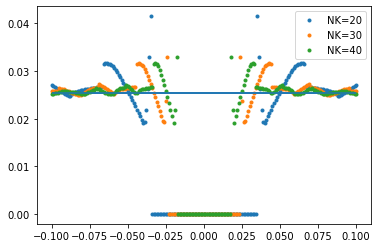

In [266]:
for NK in 20,30,40:
    BD = result[NK].results["berry_dipole_surf"].data
    BD_trace=BD[:,0,0]+BD[:,1,1]+BD[:,2,2]
    plt.plot(Efermi,BD_trace,".",label = f"NK={NK}")
    plt.hlines(1/(4*np.pi**2),xmin=-0.1,xmax=0.1)
    plt.legend()

In [ ]:
plt.close()
ahc = result_run.results["ahc"].data[:,2]
plt.plot(Efermi,ahc)

In [ ]:
# The 2D conductance in the gap is 
ahc[Efermi_haldane==0]*system_haldane.real_lattice[2,2]*1e-10

In [13]:
# This is precisely half of conductance quantum
from scipy.constants import physical_constants as pc
[k for k in pc.keys() if "conduc" in k]
pc['conductance quantum']
pc['conductance quantum'][0]/2


3.8740458645e-05

# Quantized circular photogavlanic efect

https://www.nature.com/articles/ncomms15995

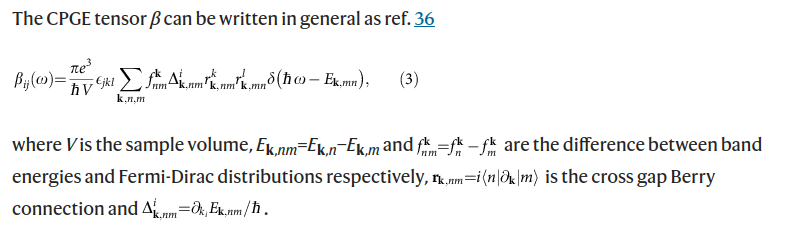

In [360]:
from  wannierberri.symmetry import transform_ident, transform_odd
from wannierberri.calculators.dynamic import DynamicCalculator

class CPGE_Formula():
    """
    Eq. (10) of Lihm and Park, PRB 105, 045201 (2022)
    Use v_mn = i * r_mn * (e_m - e_n) / hbar to replace v with r.
    """

    def __init__(self, data_K,external_terms=True):
        if external_terms:
            A_H = data_K.A_H
        else:
            A_H = data_K.A_H_internal
        V_H = data_K.Xbar('Ham', 1) # (k, m, n, a)
        V_H_diag = np.diagonal(V_H, axis1=1, axis2=2).transpose(0, 2, 1) # (k, m, a)

        # compute delta_V[k, m, n, a] = V_H[k, m, m, a] - V_H[k, n, n, a]
        delta_V = V_H_diag[:, :, None, :] - V_H_diag[:, None, :, :] # (k, m, n, a)

        Imn_abc = np.einsum('kmna,kmnb,knmc->kmnabc', delta_V, A_H, A_H)
        Imn = Imn_abc[:,:,:,:,[1,2,0],[2,0,1]]-Imn_abc[:,:,:,:,[2,0,1],[1,2,0]]
      #  print ("trImn=",sum([Imn[:,:,:,i,i].imag for i in (0,1,2)]))
      #  print ("deltaV=",np.linalg.norm(delta_V,axis=3))
      #  Imn=
        self.Imn = sum([Imn[:,:,:,i,i] for i in (0,1,2)])
        self.ndim = 1j

    def trace_ln(self, ik, inn1, inn2):
        return self.Imn[ik, inn1].sum(axis=0)[inn2].sum(axis=0)


class CPGE(DynamicCalculator):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.Formula = CPGE_Formula
        self.transformTR  = transform_ident
        self.transformInv = transform_odd
        self.constant_factor = 1


    def factor_omega(self, E1, E2):
        delta_arg_12 = E1 - E2 - self.omega  # argument of delta function [iw, n, m]
        return self.smear(delta_arg_12)

In [356]:
Efermi_Weyl = np.array([0.025])
omega = np.linspace(0,0.1,100)
Efermi=Efermi_Weyl
calculators = {
           #    "dos":wberri.calculators.static.DOS(Efermi=Efermi,tetra=True),
            #   "berry_dipole_surf":wberri.calculators.static.BerryDipole_FermiSurf(Efermi=Efermi,tetra=True,kwargs_formula={"external_terms":False}),
               #"berry_dipole_sea":wberri.calculators.static.BerryDipole_FermiSea(Efermi=Efermi,tetra=True,kwargs_formula={"external_terms":False})
         "cpge": CPGE(Efermi=Efermi,omega=omega,smr_fixed_width=0.01, smr_type='Gaussian',kwargs_formula={"external_terms":False})
}

result={}
for NK in 10,20,40,60,80:
    grid = wberri.Grid(system_weyl, NK=NK, NKFFT=10 )
    result[NK] = wberri.run(system_weyl,
            grid=grid,
            calculators = calculators,
            parallel=parallel,
            adpt_num_iter=0,
            fout_name='Weyl',
            )
    #BD = result[NK].results["cpge"].data
    #plt.plot(Efermi,BD[:,2,2]*3,".",label = f"NK={NK}")
    #plt.legend()

calculator not described

determining grids from NK=10 (<class 'int'>), NKdiv=None (<class 'NoneType'>), NKFFT=10 (<class 'NoneType'>)
The grids were set to NKdiv=[1 1 1], NKFFT=[10 10 10], NKtot=[10 10 10]
Grid is regular
The set of k points is a Grid() with NKdiv=[1 1 1], NKFFT=[10 10 10], NKtot=[10 10 10]
generating K_list
Done in 0.0006465911865234375 s 
excluding symmetry-equivalent K-points from initial grid
Done in 0.004179239273071289 s 
Done in 0.004210710525512695 s 
K_list contains 1 Irreducible points(100.0%) out of initial 1x1x1=1 grid
Done, sum of weights:1.0
iteration 0 - 1 points. New points are:
 K-point 0 : coord in rec.lattice = [   0.000000  ,   0.000000 ,    0.000000 ], refinement level:0, factor = 1.0dK=[1. 1. 1.]  
symgroup : <wannierberri.symmetry.Group object at 0x7f7b1df84970>
processing 1 K points : in serial.
# K-points calculated  Wall time (sec)  Est. remaining (sec)
time for processing      1 K-points in serial:     0.7763 ; per K-point          0.7763 ; 

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


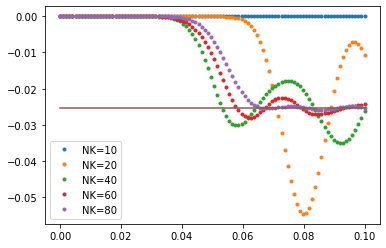

In [361]:
for NK in result.keys():
    cpge = result[NK].results["cpge"].data
    plt.plot(omega,cpge[0,:],".",label = f"NK={NK}")
plt.plot(omega,-np.ones(omega.shape)/(4*np.pi**2))
plt.legend()

In [286]:
Efermi

array([-0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ])